## **VISÃO COMPUTACIONAL - AULA 04**

**Objetivos da aula:**

*   conhecer e aplicar o conceito de transformação geométrica
*   conhecer e praticar com as transformações geométricas de escala, translação e rotação










In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('lena.png')
imgMatriz = cv2.imread('matrizes.png')

## **TRANSFORMAÇÕES GEOMÉTRICAS COM MATRIZES 2x3**

Grande parte das tranformações geométricas aplicadas a imagens utiliza uma matriz 2x3. Em OpenCV, conhecendo-se a matriz de transformação M, é possível transformar qualquer imagem. 


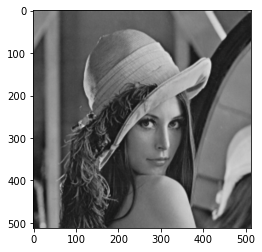

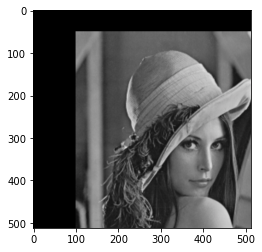

In [17]:
height, width = img.shape[:2]

M = np.float32([[  1,  0, 100],
                [  0,  1,  50]])

res = cv2.warpAffine(img, M, (width, height))

plt.imshow(img)
plt.show()
plt.imshow(res)
plt.show()

Porém, algumas transformações mais tradicionais já possuem funções de preenchimento destas matrizes.

A primeira delas é transformação de **escala**.

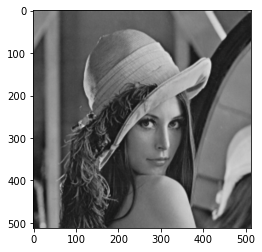

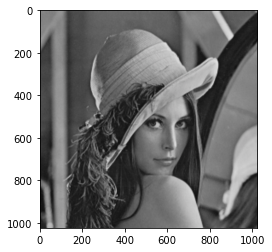

In [3]:

res = cv2.resize(img, (2*width, 2*height), interpolation=cv2.INTER_CUBIC)

plt.imshow(img)
plt.show()
plt.imshow(res)
plt.show()


## **EXERCÍCIO**

Refaça o exercício anterior, porém definindo uma matriz de transformação afim M.

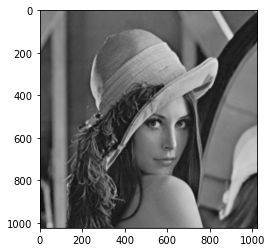

In [23]:
shape = (img.shape[0]*2, img.shape[1]*2)
scale_Matrix = np.float32([[2, 0, 0],
                           [0, 2, 0]])

aa = cv2.warpAffine(img, scale_Matrix, shape)

plt.imshow(aa)
plt.show()



## **EXERCÍCIO**

O parâmetro de interpolação **interpolation** garante a geração de novos pixels nos processos de escala. Abaixo, temos uma lista de valores possíveis para este parâmetro:

cv::INTER_NEAREST = 0 <br>
cv::INTER_LINEAR = 1 <br>
cv::INTER_CUBIC = 2 <br>
cv::INTER_AREA = 3<br>
cv::INTER_LANCZOS4 = 4<br>
cv::INTER_LINEAR_EXACT = 5<br>
cv::INTER_NEAREST_EXACT = 6<br>
cv::INTER_MAX = 7<br>
cv::WARP_FILL_OUTLIERS = 8<br>
cv::WARP_INVERSE_MAP = 16<br>


Utilizando a célula abaixo, verifique se há alguma diferença visual na aplicação de alguns deles. 

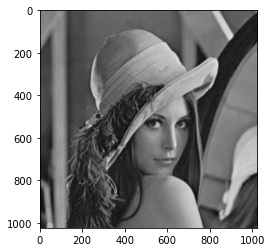

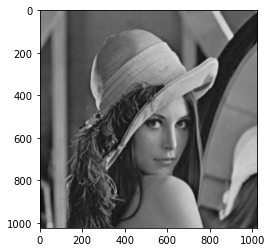

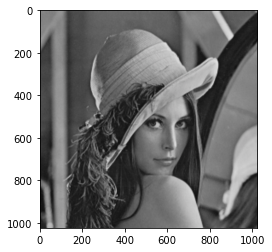

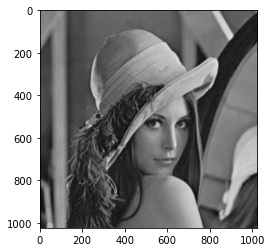

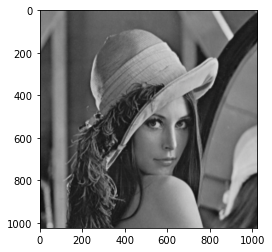

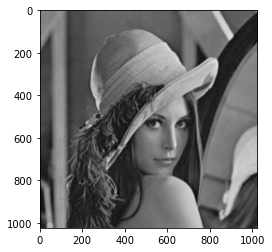

In [33]:
#sua análise
for i in range(6):
    res = cv2.resize(img, (2*width, 2*height), interpolation=i)
    plt.imshow(res)
    plt.show()


A segunda transformação é a **translação**. 

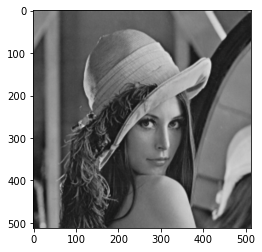

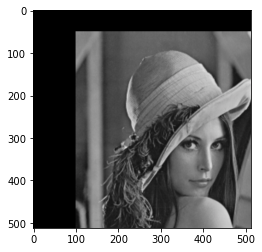

In [6]:

M = np.float32([[  1,   0, 100],
                [  0,   1,  50]])

res = cv2.warpAffine(img, M, (width, height))

plt.imshow(img)
plt.show()
plt.imshow(res)
plt.show()


## **EXERCÍCIO**

Refaça o exercício anterior, deixando o centro da imagem posicionado na coordenada (0,0).

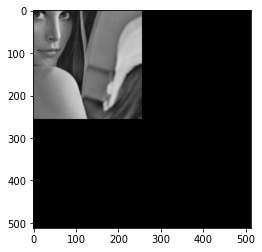

In [31]:
M = np.float32([[  1,   0, -width/2],
                [  0,   1,  -height/2]])

res = cv2.warpAffine(img, M, (width, height))

plt.imshow(res)
plt.show()


A terceira transformação é a **rotação**.

[[   0.70710678    0.70710678 -105.83156519]
 [  -0.70710678    0.70710678  255.5       ]]


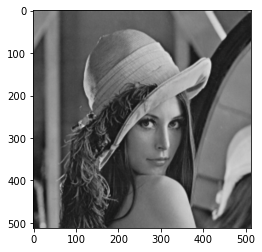

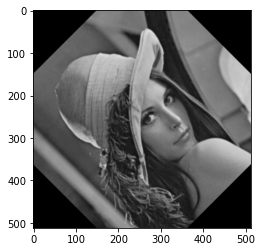

In [8]:
center = ((width - 1) / 2.0, (height - 1) / 2.0)

angle = 45  #ângulo positivo (antihorário)  ângulo negativo (horário)
scale = 1
M = cv2.getRotationMatrix2D(center, angle, scale)
print(M)

dest = cv2.warpAffine(img, M, (width, height))

plt.imshow(img)
plt.show()
plt.imshow(dest)
plt.show()


## **EXERCÍCIO**

Será que a ordem de aplicação de duas transformações consecutivas pode alterar o resultado final da imagem, isto é, se formos aplicar as transformações A e B, será que tanto faz aplicar AB ou BA ? Justifique. 

In [9]:
#seu código vai aqui

## **TRANSFORMAÇÕES GEOMÉTRICAS COM MATRIZES 3D**

Podemos, também, trabalhar com transformações de imagens usando matrizes 3x3. Abaixo, temos um resumo destas matrizes.

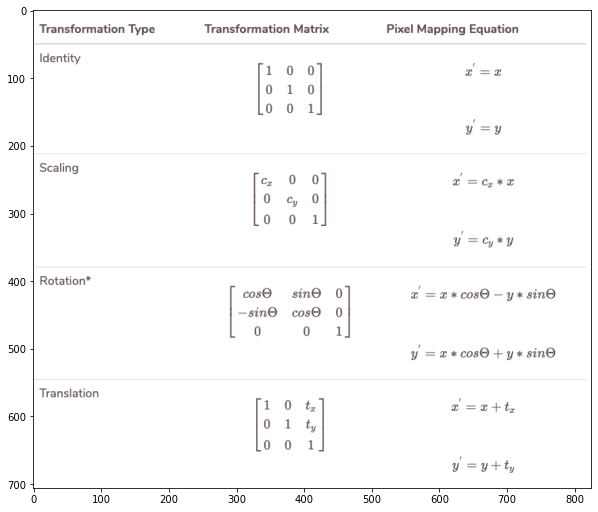

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(imgMatriz);

Porém, para aplicar a transformação com matrizes 3x3, devemos usar a função **warpPerspective(img,M,(width,height))** ao invés de **warpAffine(img,M,(width,height))**.

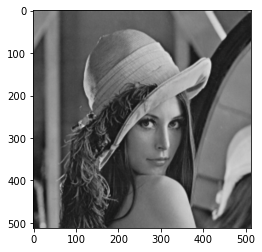

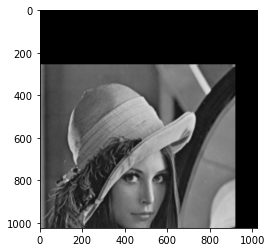

In [54]:
M = np.float32([[  2,   0,   0],
                [  0,   2,   0],
                [  0,   0,   1]])

res = cv2.warpPerspective(img, M, (width*2, height*2))

plt.imshow(img)
plt.show()
plt.imshow(res)
plt.show()


## **EXERCÍCIO**

Uma das grandes vantagens do uso de matrizes 3x3 para calcular transformações é que elas são matrizes quadradas. Assim, é possível calcular a sua inversa (usando, por exemplo, a função numpy.linalg.inv).

Faça uma rotação da imagem lena.png de 45 graus no sentido horário usando uma matriz 3x3 M e exiba seu resultado. Reverta o efeito desta operação calculando a inversa da matriz M.

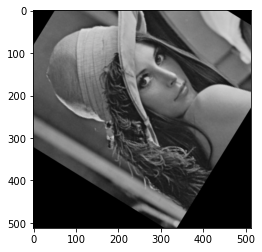

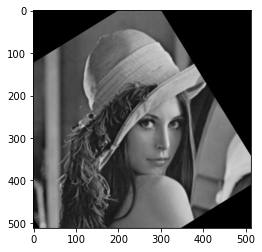

In [60]:
#sua solução vai aqui
angle = -45
rad = np.radians(angle)
rotation_M = np.float32([[ np.cos(rad), np.sin(rad),   0],
                         [-np.sin(rad), np.cos(rad),   0],
                         [           0,           0,   1]])

img45 = cv2.warpPerspective(img, M, (width, height))

plt.imshow(img45)
plt.show()
MI = np.linalg.inv(M)

img_reset = cv2.warpPerspective(img45, MI, (width, height))
plt.imshow(img_reset)
plt.show()